In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

In [4]:
warnings.filterwarnings('ignore')

In [8]:
os.chdir('../dataset')
!dir

 Volume in drive C has no label.
 Volume Serial Number is 9A3C-60F9

 Directory of C:\Users\wali\Documents\Projects\RegressionModels\dataset

06/15/2024  06:47 PM    <DIR>          .
06/24/2024  08:56 PM    <DIR>          ..
05/02/2024  01:01 PM           280,246 BTC-USD.csv
06/15/2024  06:47 PM            26,717 CarPrice.csv
05/02/2024  12:59 PM               109 COMPLETE_FLIGHT_DATASET_2015.txt
05/02/2024  12:57 PM         1,500,835 Dry_Bean.csv
05/02/2024  12:57 PM           342,976 FLIGHT-2015.csv
06/07/2024  09:58 PM         2,296,273 FLIGHT100k.csv
06/15/2024  06:37 PM           107,745 infrared_thermography_temperature.csv
05/02/2024  12:57 PM            48,136 NHANES_age_prediction.csv
05/17/2024  02:40 PM           430,835 Rice_Cammeo_Osmancik.csv
06/15/2024  06:40 PM           131,539 SalesData.csv
              10 File(s)      5,165,411 bytes
               2 Dir(s)  12,764,766,208 bytes free


In [9]:
df = pd.read_csv('FLIGHT-2015.csv')
df.head()

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,AIR_TIME
0,545,545,0,100,413,725,705,65
1,1620,1618,-2,108,554,1808,1752,73
2,1513,1519,6,181,1024,1714,1702,147
3,1302,1258,-4,73,331,1415,1410,51
4,645,638,-7,155,889,820,758,127


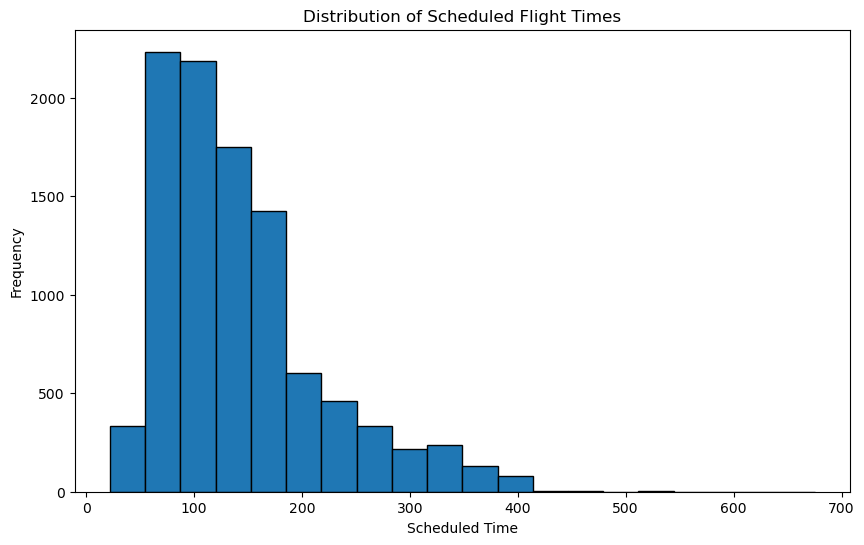

In [10]:
# @title Distribution of Scheduled Flight Times

plt.figure(figsize=(10, 6))
plt.hist(df['SCHEDULED_TIME'], bins=20, edgecolor='black')
plt.xlabel('Scheduled Time')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Scheduled Flight Times')

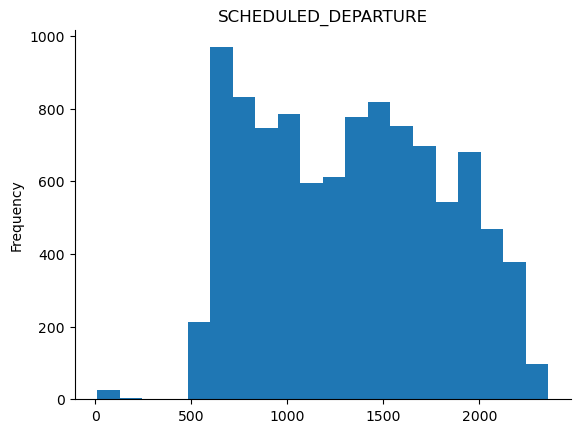

In [11]:
# @title SCHEDULED_DEPARTURE

df['SCHEDULED_DEPARTURE'].plot(kind='hist', bins=20, title='SCHEDULED_DEPARTURE')
plt.gca().spines[['top', 'right',]].set_visible(False)

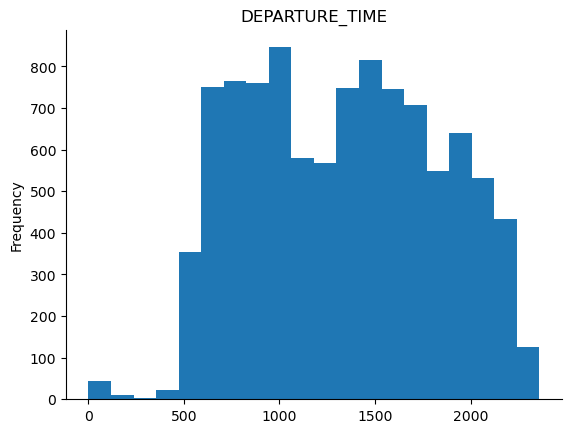

In [12]:
# @title DEPARTURE_TIME

df['DEPARTURE_TIME'].plot(kind='hist', bins=20, title='DEPARTURE_TIME')
plt.gca().spines[['top', 'right',]].set_visible(False)

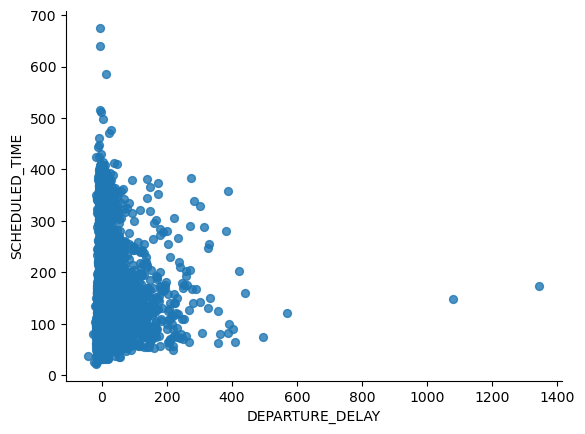

In [13]:
# @title DEPARTURE_DELAY vs SCHEDULED_TIME

df.plot(kind='scatter', x='DEPARTURE_DELAY', y='SCHEDULED_TIME', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

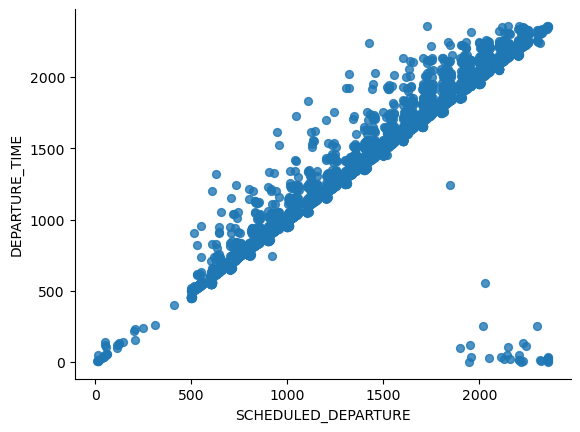

In [14]:
# @title SCHEDULED_DEPARTURE vs DEPARTURE_TIME

df.plot(kind='scatter', x='SCHEDULED_DEPARTURE', y='DEPARTURE_TIME', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

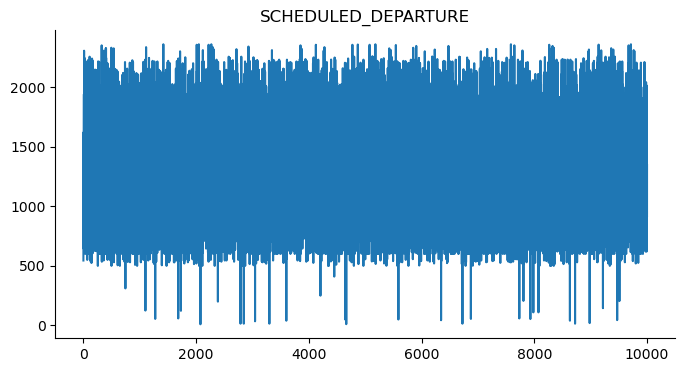

In [15]:
# @title SCHEDULED_DEPARTURE

df['SCHEDULED_DEPARTURE'].plot(kind='line', figsize=(8, 4), title='SCHEDULED_DEPARTURE')
plt.gca().spines[['top', 'right']].set_visible(False)

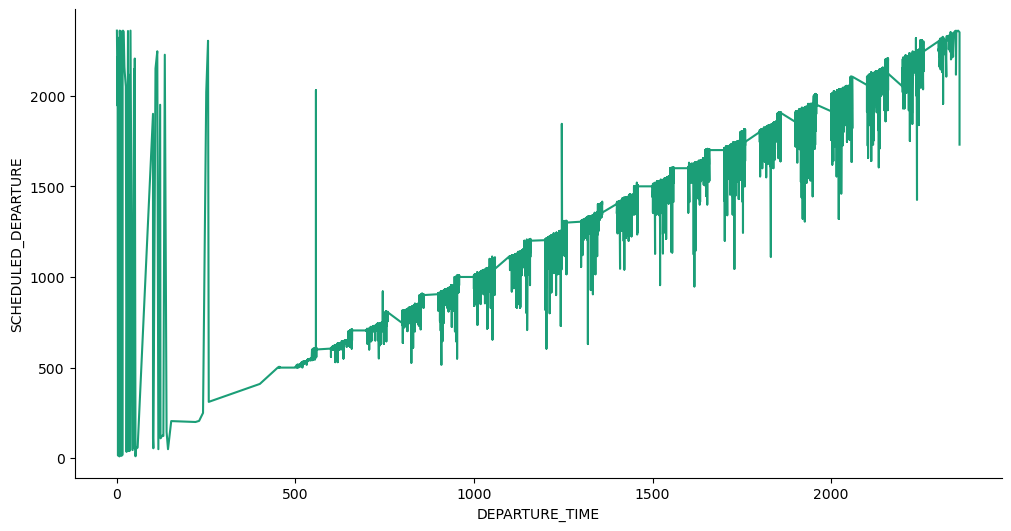

In [16]:
# @title DEPARTURE_TIME vs SCHEDULED_DEPARTURE

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DEPARTURE_TIME']
  ys = series['SCHEDULED_DEPARTURE']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('DEPARTURE_TIME', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DEPARTURE_TIME')
_ = plt.ylabel('SCHEDULED_DEPARTURE')

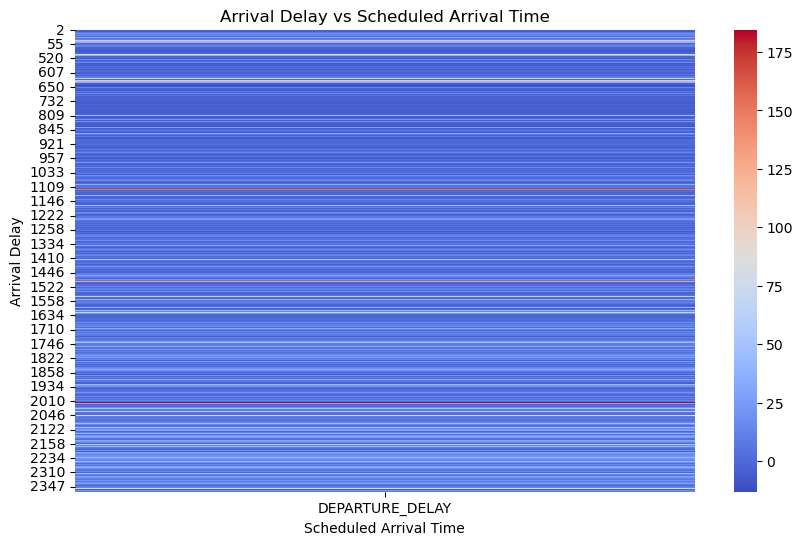

In [17]:
# @title Arrival Delay vs Scheduled Arrival Time

plt.figure(figsize=(10, 6))
sns.heatmap(df.pivot_table(index='SCHEDULED_ARRIVAL', values='DEPARTURE_DELAY', aggfunc='mean'), cmap='coolwarm')
plt.xlabel('Scheduled Arrival Time')
plt.ylabel('Arrival Delay')
_ = plt.title('Arrival Delay vs Scheduled Arrival Time')